In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Decision Tree

from sklearn.tree import DecisionTreeClassifier

#SVC

from sklearn.svm import SVC

#Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

#K-Neighbor

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
dataset = pd.read_csv("drebin.csv", sep=',',  engine='python', index_col=False, dtype='unicode', encoding='latin')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7255 entries, 0 to 7254
Columns: 216 entries, transact to class
dtypes: object(216)
memory usage: 12.0+ MB


In [ ]:
dataset.describe(include='object')

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
count,7255,7255,7255,7255,7255,7255,7255,7255,7255,7255,...,7254,7254,7254,7254,7254,7254,7254,7254,7254,7254
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,S
freq,5839,5676,5693,5870,5674,5374,4152,6157,6393,6211,...,5543,7134,7219,4115,4817,5077,7151,7189,6925,5560


In [ ]:
dataset['class'] = dataset['class'].astype(str)

In [ ]:
classes, count = np.unique(dataset['class'], return_counts=True)

In [ ]:
dataset['class'] = dataset['class'].astype(str)  # Convert to string
classes, count = np.unique(dataset['class'], return_counts=True)
lbl_enc = LabelEncoder()
encoded_classes=lbl_enc.fit_transform(classes)
print(encoded_classes, classes)
dataset['class'] = dataset['class'].map(dict(zip(classes, encoded_classes)))

[0 1 2] ['B' 'None' 'S']


In [ ]:
print("Total Features : ",len(dataset.columns)-1)

Total Features :  215


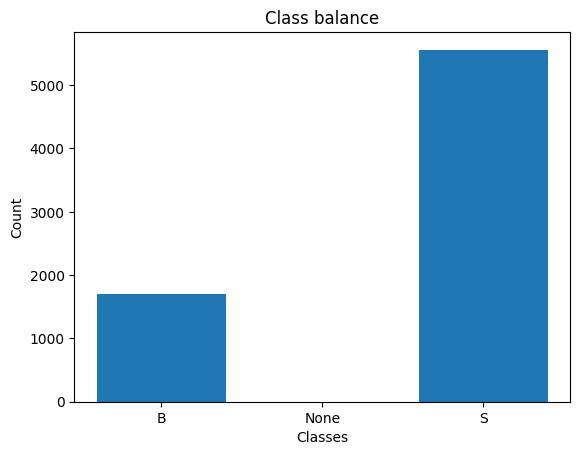

In [ ]:
plt.bar(classes,count)
plt.title("Class balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [ ]:
X = dataset.drop("class", axis=1)
y = dataset["class"]

class_counts = y.value_counts()

# Calculate the majority and minority class labels
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Separate majority and minority class samples
majority_samples = dataset[dataset["class"] == majority_class]
minority_samples = dataset[dataset["class"] == minority_class]

# Oversample the minority class to match the majority class
minority_oversampled = resample(minority_samples,replace=True,n_samples=len(majority_samples),random_state=0)
# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([majority_samples, minority_oversampled])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=0)

# Now, balanced_data contains the balanced dataset with equal instances of both classes

In [ ]:
balanced_class_counts = balanced_data["class"].value_counts()

# Print the class counts
print(balanced_class_counts)

balanced_data

class
2    5560
1    5560
Name: count, dtype: int64


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
2585,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2
7254,1,1,1,1,1,1,0,1,1,1,...,None,None,None,None,None,None,None,None,None,1
5270,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7254,1,1,1,1,1,1,0,1,1,1,...,None,None,None,None,None,None,None,None,None,1
1286,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,2
3264,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7254,1,1,1,1,1,1,0,1,1,1,...,None,None,None,None,None,None,None,None,None,1
7254,1,1,1,1,1,1,0,1,1,1,...,None,None,None,None,None,None,None,None,None,1


In [ ]:
balanced_data = balanced_data.replace('?', np.nan)

In [ ]:
for column in balanced_data.columns:
    try:
        balanced_data[column] = pd.to_numeric(balanced_data[column])
    except ValueError:
        # Handle columns that cannot be converted, e.g., non-numeric columns
        pass

In [ ]:
corrdata = balanced_data.corr()

In [ ]:
balanced_data = balanced_data.replace('?', np.nan)

for column in balanced_data.columns:
    try:
        balanced_data[column] = pd.to_numeric(balanced_data[column])
    except ValueError:
        pass

corrdata = balanced_data.corr()

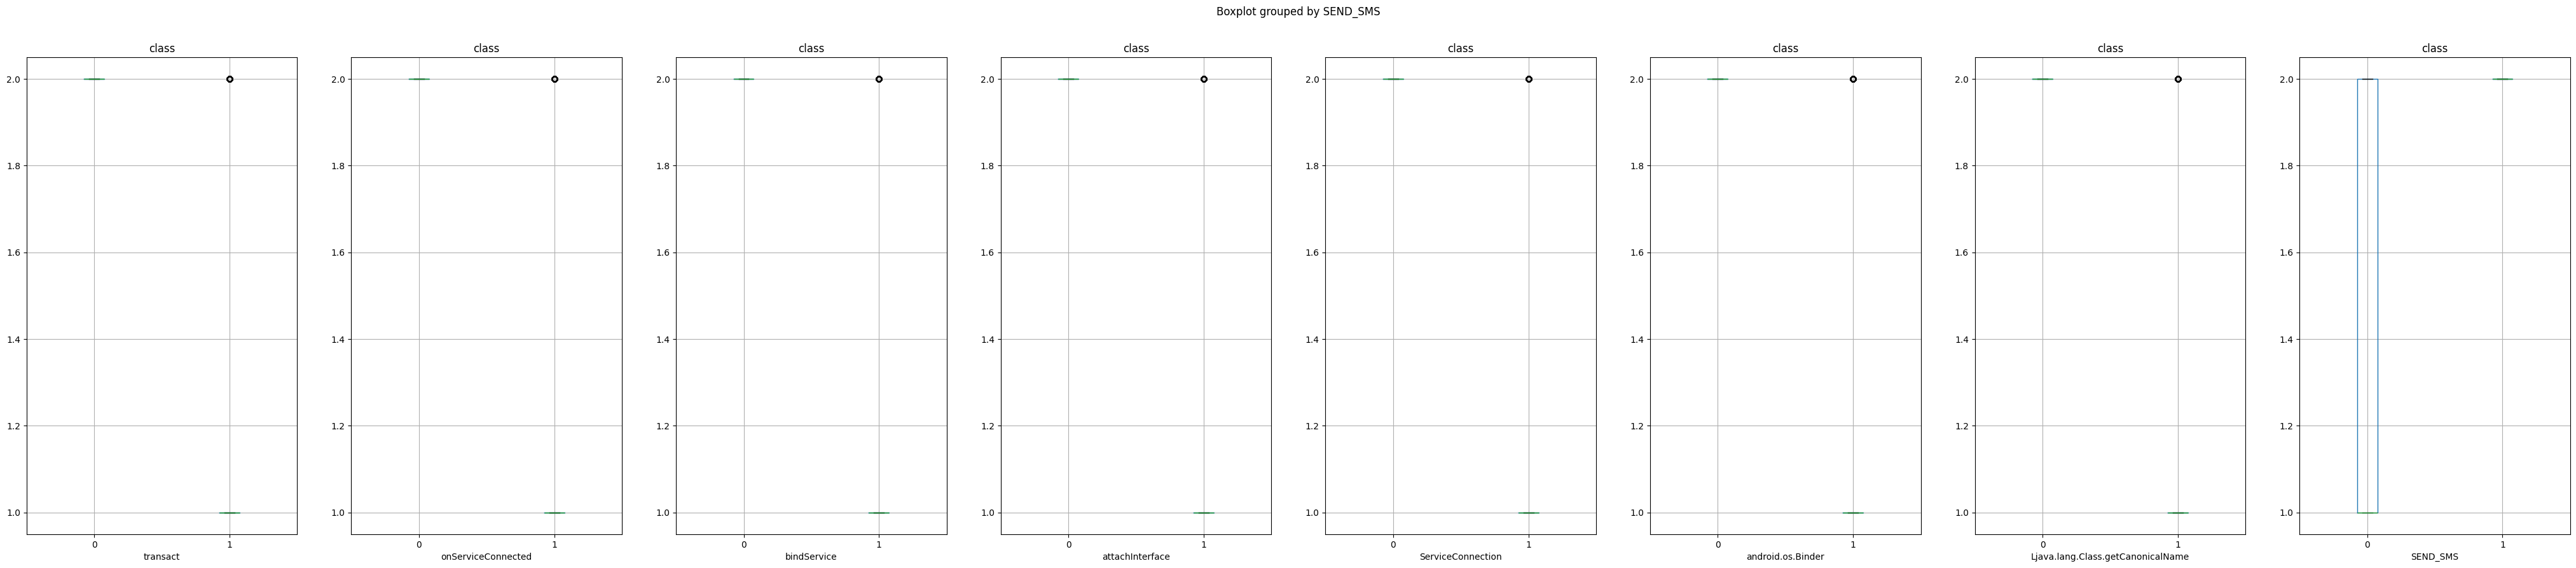

In [ ]:
CategoricalColsList=['transact', 'onServiceConnected', 'bindService', 'attachInterface', 'ServiceConnection', 'android.os.Binder','Ljava.lang.Class.getCanonicalName','SEND_SMS']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(50,10))

# Creating box plots for each continuous predictor against the Target Variable "class"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    balanced_data.boxplot(column='class', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])


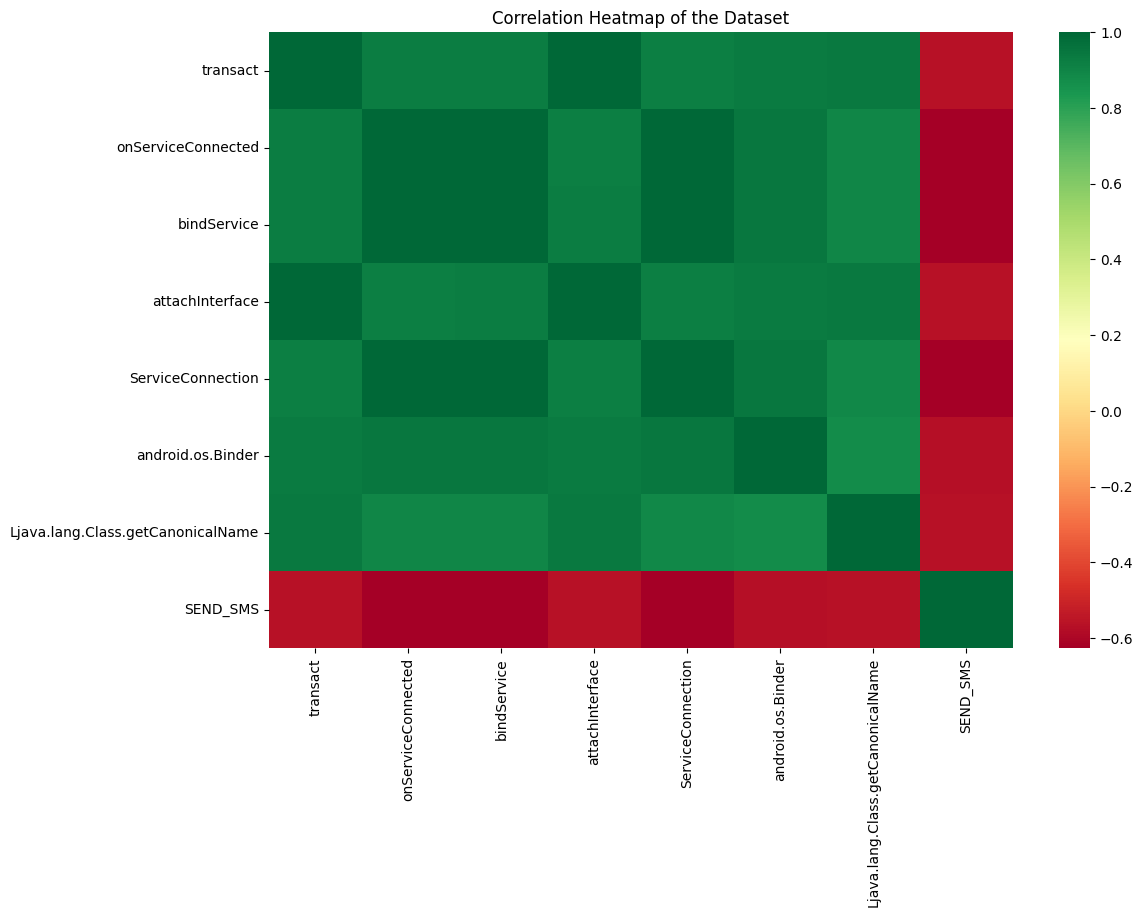

In [ ]:
CorrelationData=balanced_data[CategoricalColsList].corr()
import seaborn as sns
# Plot the heatmap
plt.figure(figsize=(12, 8))
#heatmap = sns.heatmap(dataset.corr(), annot=False, cmap="RdYlGn")
heatmap = sns.heatmap(CorrelationData, annot=False, cmap="RdYlGn")
plt.title("Correlation Heatmap of the Dataset")
plt.show()

In [ ]:
TargetVariable='class'
Predictors=['transact', 'onServiceConnected', 'bindService', 'attachInterface', 'ServiceConnection', 'android.os.Binder','Ljava.lang.Class.getCanonicalName','SEND_SMS']

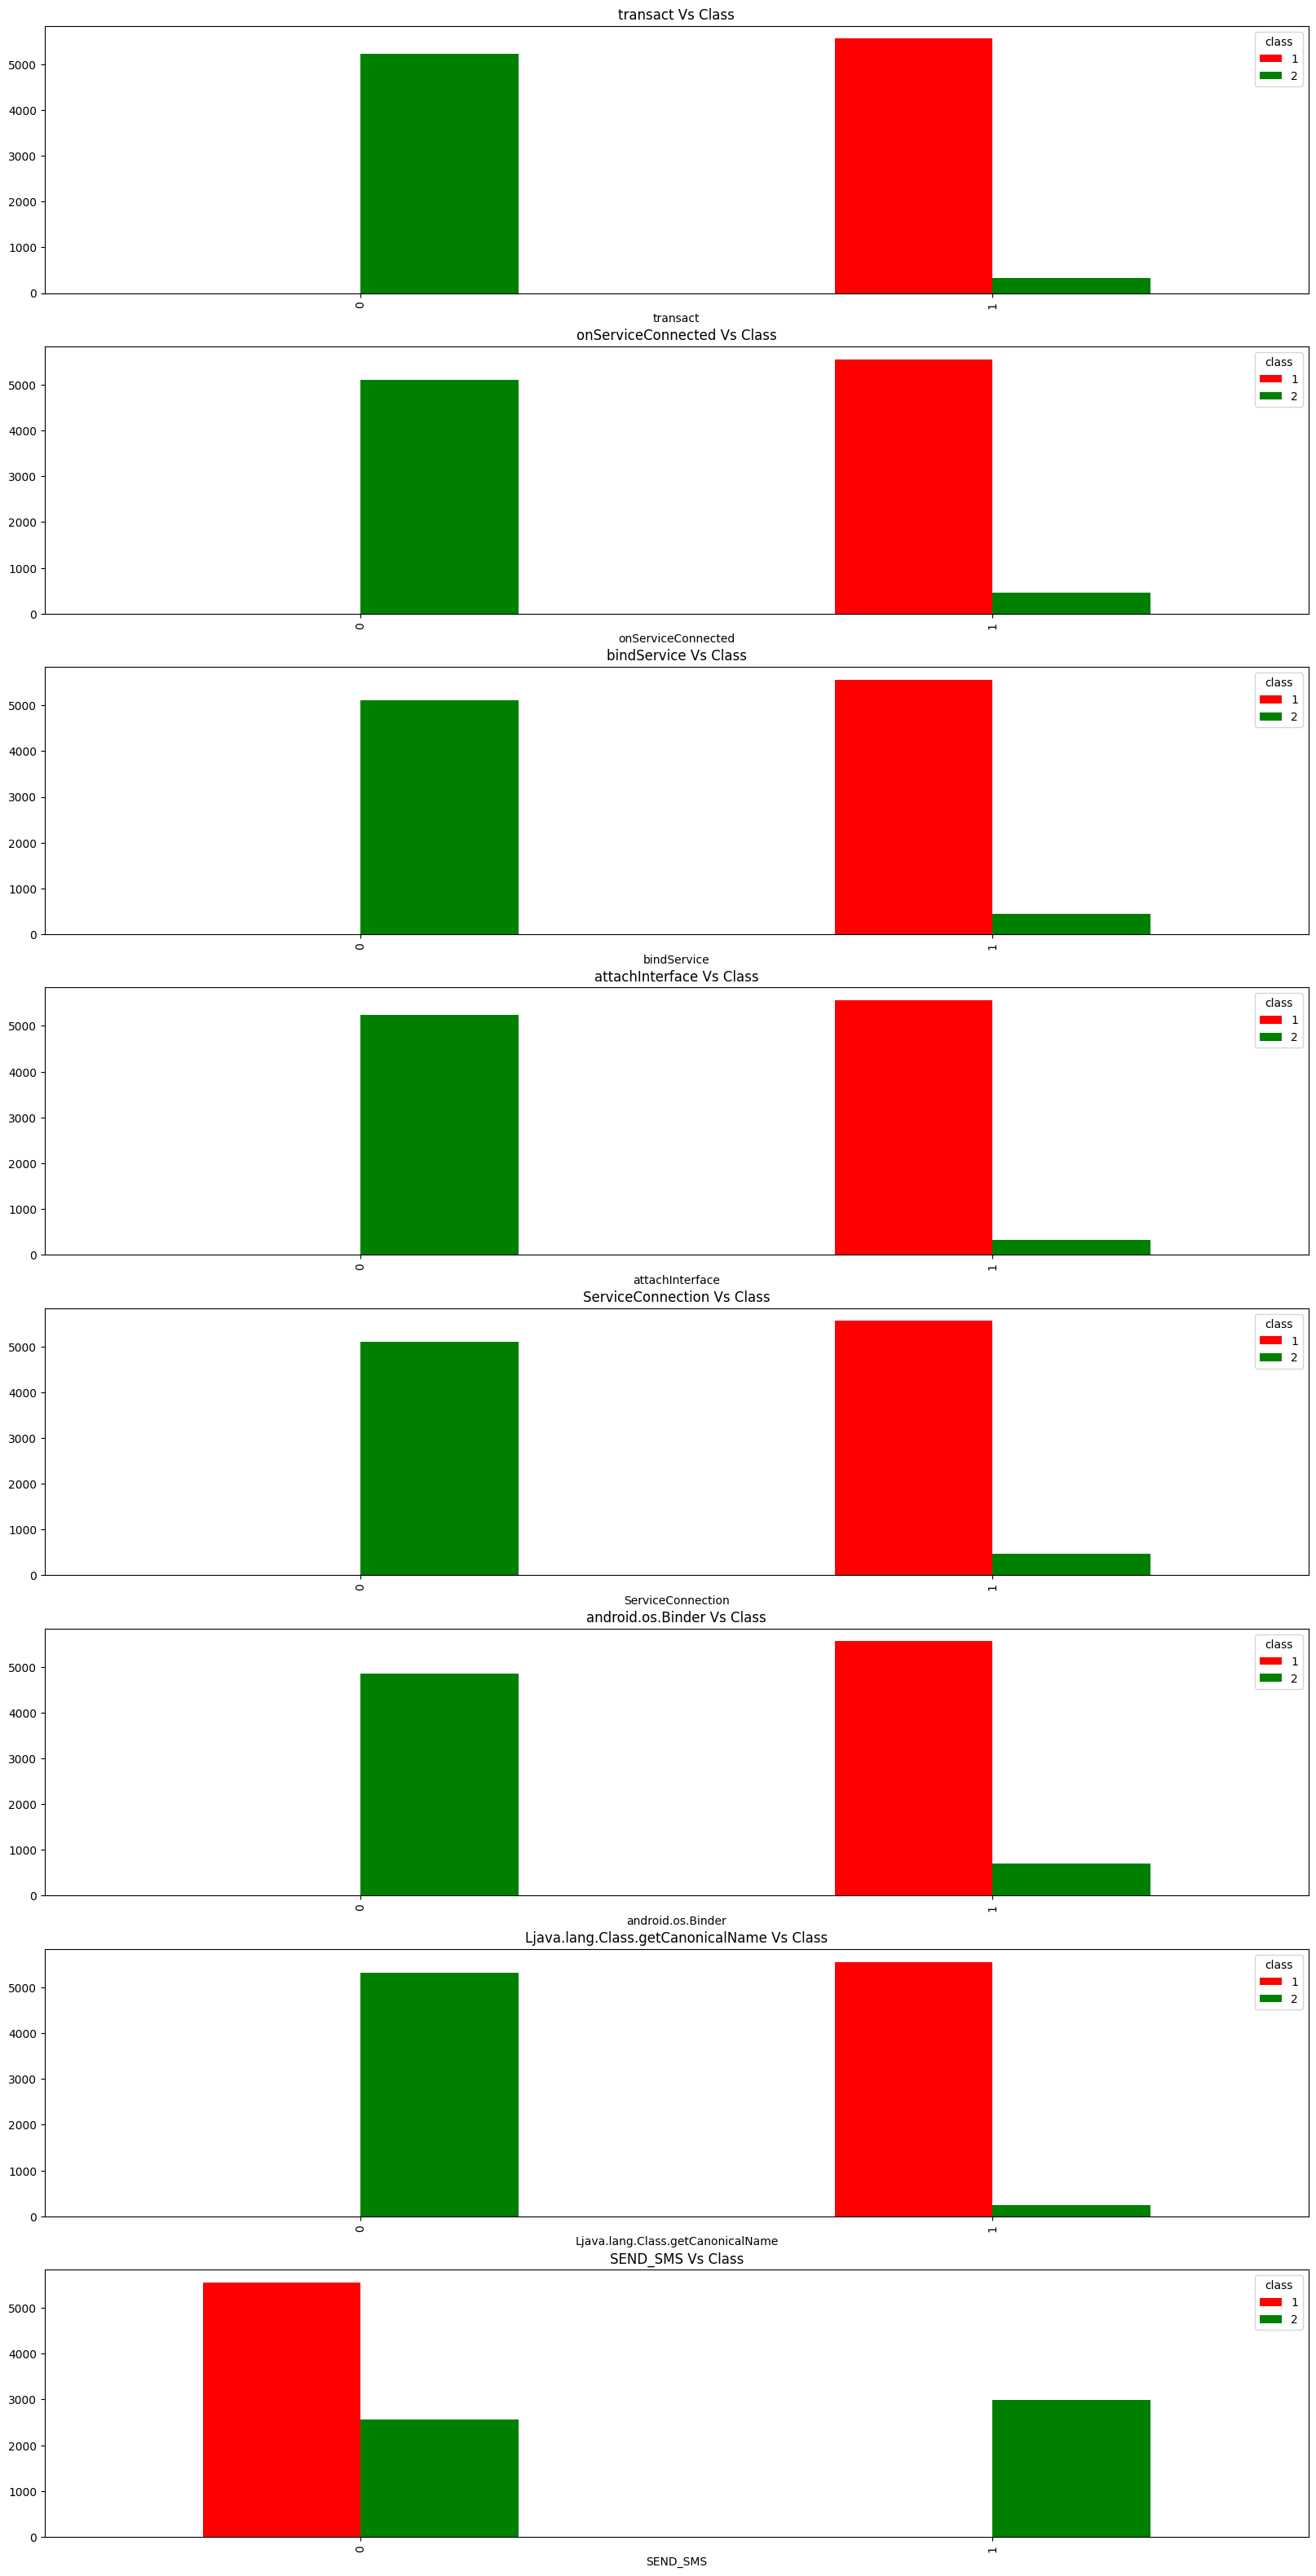

In [ ]:
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(Predictors), ncols=1, figsize=(20,40))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Class"
for CategoricalCol , i in zip(Predictors, range(len(Predictors))):
    CrossTabResult=pd.crosstab(index=balanced_data[CategoricalCol], columns=balanced_data['class'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Class')

In [ ]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject null hypothesis H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [ ]:
FunctionChisq(inpData=balanced_data,
              TargetVariable='class',
              CategoricalVariablesList= Predictors)

transact is correlated with class | P-Value: 0.0
onServiceConnected is correlated with class | P-Value: 0.0
bindService is correlated with class | P-Value: 0.0
attachInterface is correlated with class | P-Value: 0.0
ServiceConnection is correlated with class | P-Value: 0.0
android.os.Binder is correlated with class | P-Value: 0.0
Ljava.lang.Class.getCanonicalName is correlated with class | P-Value: 0.0
SEND_SMS is correlated with class | P-Value: 0.0


['transact',
 'onServiceConnected',
 'bindService',
 'attachInterface',
 'ServiceConnection',
 'android.os.Binder',
 'Ljava.lang.Class.getCanonicalName',
 'SEND_SMS']

In [ ]:
FinalDF = balanced_data[Predictors]
FinalDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11120 entries, 2585 to 2732
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   transact                           11120 non-null  int64
 1   onServiceConnected                 11120 non-null  int64
 2   bindService                        11120 non-null  int64
 3   attachInterface                    11120 non-null  int64
 4   ServiceConnection                  11120 non-null  int64
 5   android.os.Binder                  11120 non-null  int64
 6   Ljava.lang.Class.getCanonicalName  11120 non-null  int64
 7   SEND_SMS                           11120 non-null  int64
dtypes: int64(8)
memory usage: 781.9 KB


In [ ]:
y = balanced_data['class']
X = balanced_data[Predictors]
train_x,test_x,train_y,test_y = train_test_split(X.values,
                                                 y.values,
                                                  test_size = 0.2,
                                                  shuffle=True)

In [ ]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (8896, 8)
Train labels :  (8896,)
Test Features :  (2224, 8)
Test labels :  (2224,)


In [ ]:
d2_train_y = train_y.reshape((-1,1))
d2_test_y = test_y.reshape((-1,1))

In [ ]:
print("Train features : ",train_x.shape)
print("Train labels : ",d2_train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",d2_test_y.shape)

Train features :  (8896, 8)
Train labels :  (8896, 1)
Test Features :  (2224, 8)
Test labels :  (2224, 1)


DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1130
           2       1.00      0.99      1.00      1094

    accuracy                           1.00      2224
   macro avg       1.00      1.00      1.00      2224
weighted avg       1.00      1.00      1.00      2224

[[1130    0]
 [   8 1086]]
Accuracy of the model on Testing Sample Data: 1.0

Accuracy values for 10-fold Cross Validation:
 [0.99730214 0.99550351 0.99730214 0.99730214 0.99730214 0.99820143
 0.99640283 0.99820143 0.99730214 0.99550351]

Final Average Accuracy of the model: 1.0


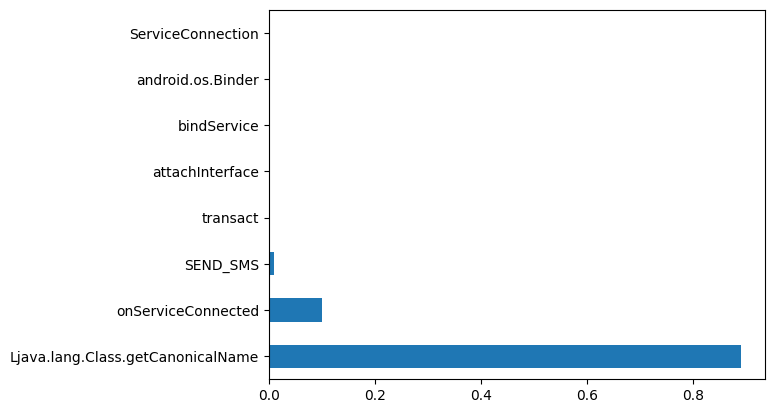

In [ ]:
from sklearn import tree
#choose from different tunable hyper parameters
CLFModel = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(CLFModel)

# Creating the model on Training Data
DTree=CLFModel.fit(train_x,train_y)
prediction=DTree.predict(test_x)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(test_y, prediction))
print(metrics.confusion_matrix(test_y, prediction))

# Printing the Overall Accuracy of the model
DT_F1_Score=metrics.f1_score(test_y, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(DT_F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# Creating the model on Training Data

kernel_list = ['linear', 'poly', 'rbf']
SVC_F1_Score_Kernal=[]
SVC_F1_Score_Value=[]

for kernel in kernel_list:
    from sklearn.svm import SVC
    CLFModel = SVC(kernel=kernel)
    SVC = CLFModel.fit(train_x, train_y)
    prediction=SVC.predict(test_x)
# Measuring accuracy on Testing Data

    print(metrics.classification_report(test_y, prediction))
    print(metrics.confusion_matrix(test_y, prediction))

# Printing the Overall Accuracy of the model
    SVC_F1_Score=metrics.f1_score(test_y, prediction, average='weighted')
    print('Accuracy of the model on Testing Sample Data:', round(SVC_F1_Score,2))
    SVC_F1_Score_Kernal.append(kernel)
    SVC_F1_Score_Value.append(SVC_F1_Score)
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
    Accuracy_Values=cross_val_score(SVC, X , y, cv=10, scoring='f1_weighted')
    print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
    print(f"Final Average Accuracy with {kernel} kernel: {Accuracy_Values.mean():.2f}")


print(SVC_F1_Score_Kernal)
print(SVC_F1_Score_Value)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1130
           2       1.00      1.00      1.00      1094

    accuracy                           1.00      2224
   macro avg       1.00      1.00      1.00      2224
weighted avg       1.00      1.00      1.00      2224

[[1130    0]
 [   5 1089]]
Accuracy of the model on Testing Sample Data: 1.0

Accuracy values for 10-fold Cross Validation:
 [0.99730214 0.99640283 0.99820143 0.99730214 0.99730214 0.99820143
 0.99640283 0.99910072 0.99910072 0.99550351]
Final Average Accuracy with linear kernel: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1130
           2       1.00      1.00      1.00      1094

    accuracy                           1.00      2224
   macro avg       1.00      1.00      1.00      2224
weighted avg       1.00      1.00      1.00      2224

[[1130    0]
 [   5 1089]]
Accuracy of the model on Testing 

In [ ]:
CLFModel = LogisticRegression()

# Printing all the parameters of Linear regression
print(CLFModel)

# Creating the model on Training Data
LoREG=CLFModel.fit(train_x,train_y)
prediction=LoREG.predict(test_x)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(test_y, prediction))
print(metrics.confusion_matrix(test_y, prediction))

# Printing the Overall Accuracy of the model
Log_F1_Score=metrics.f1_score(test_y, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(Log_F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LoREG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LogisticRegression()
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1130
           2       1.00      0.99      0.99      1094

    accuracy                           0.99      2224
   macro avg       0.99      0.99      0.99      2224
weighted avg       0.99      0.99      0.99      2224

[[1130    0]
 [  13 1081]]
Accuracy of the model on Testing Sample Data: 0.99

Accuracy values for 10-fold Cross Validation:
 [0.99730214 0.99640283 0.99820143 0.99730214 0.99730214 0.99820143
 0.99640283 0.99910072 0.99910072 0.99550351]

Final Average Accuracy of the model: 1.0


In [ ]:
k = 5  # number of neighbors (k) as needed
CLFModel  = KNeighborsClassifier(n_neighbors=k)

# Printing all the parameters of Linear regression
print(CLFModel)

# Creating the model on Training Data
KN=CLFModel.fit(train_x,train_y)
prediction=KN.predict(test_x)



# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(test_y, prediction))
print(metrics.confusion_matrix(test_y, prediction))

# Printing the Overall Accuracy of the model
KN_F1_Score=metrics.f1_score(test_y, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(KN_F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LoREG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsClassifier()
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1130
           2       1.00      1.00      1.00      1094

    accuracy                           1.00      2224
   macro avg       1.00      1.00      1.00      2224
weighted avg       1.00      1.00      1.00      2224

[[1130    0]
 [   5 1089]]
Accuracy of the model on Testing Sample Data: 1.0

Accuracy values for 10-fold Cross Validation:
 [0.99730214 0.99640283 0.99820143 0.99730214 0.99730214 0.99820143
 0.99640283 0.99910072 0.99910072 0.99550351]

Final Average Accuracy of the model: 1.0


[99.6 99.8 99.8 99.8 99.4 99.8]


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

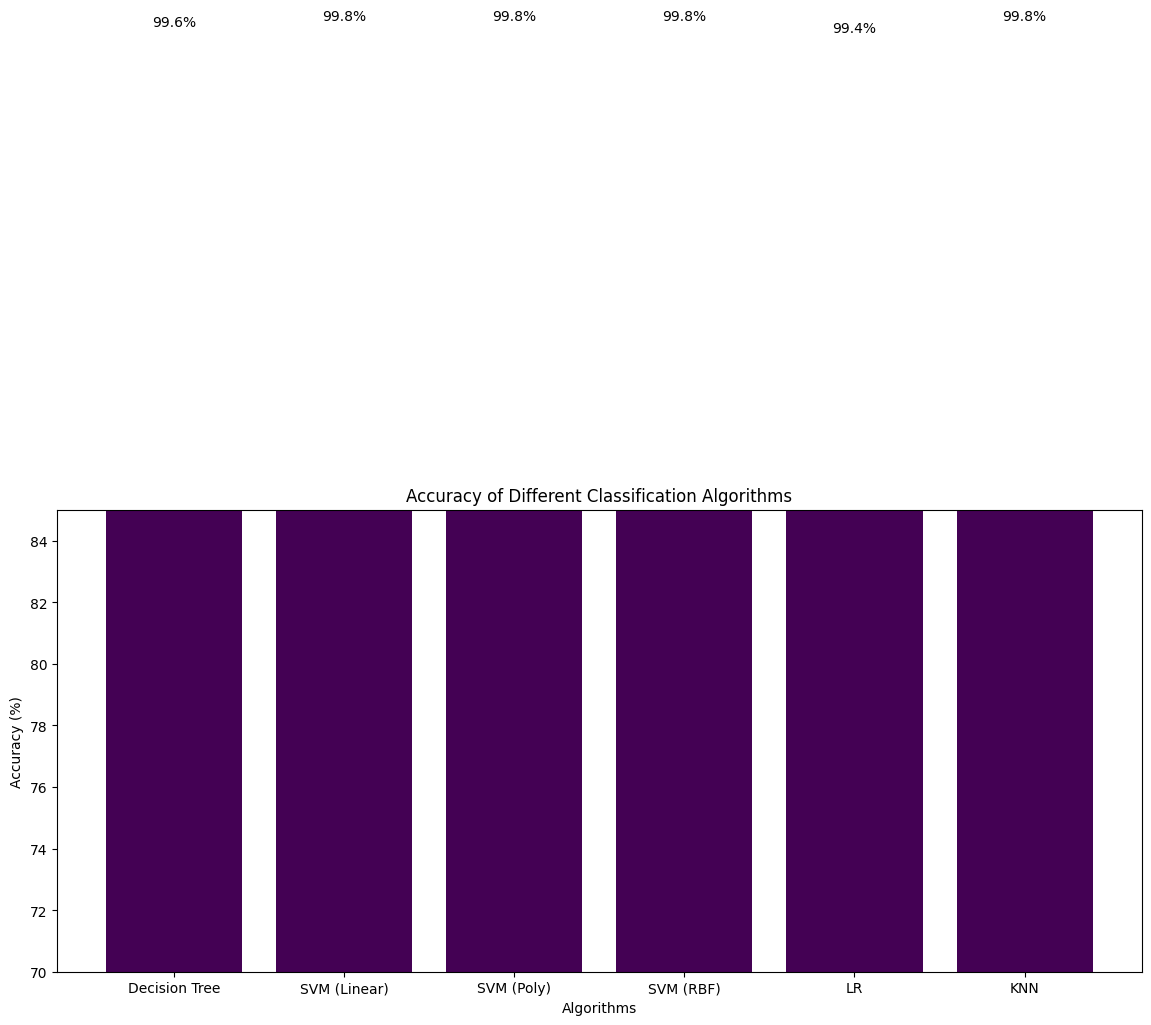

In [ ]:
import matplotlib.pyplot as plt

# Names of the algorithms
algorithms = ['Decision Tree', 'SVM (Linear)', 'SVM (Poly)', 'SVM (RBF)', 'LR', 'KNN']

# Corresponding accuracy values
accuracies = [DT_F1_Score, SVC_F1_Score_Value[0], SVC_F1_Score_Value[1], SVC_F1_Score_Value[2], Log_F1_Score, KN_F1_Score]
accuracies = np.around(accuracies,3)*100
print(accuracies)
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Create a colorful bar graph
colors = plt.cm.viridis_r(accuracies)  # Use a colormap to generate colors
bars = plt.bar(algorithms, accuracies, color=colors)

# Add data labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}%', ha='center', va='bottom', fontsize=10)

# Customize plot elements
plt.title('Accuracy of Different Classification Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.ylim(70, 85)  # Set the y-axis limits

# Show the colorful legend indicating the accuracy range
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis_r, norm=plt.Normalize(vmin=min(accuracies), vmax=max(accuracies)))
sm._A = []  # Fake up the array of the scalar mappable
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Accuracy Range')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


# Standardize features:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Create interaction features
# Example: interact_feature = train_x[:, 0] * train_x[:, 1]
# Add interact_feature to train_x and repeat for test_x

# Train and evaluate with hyperparameter tuning:
model = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)
best_model = grid_search.best_estimator_
accuracy = best_model.score(test_x, test_y)
print("Accuracy: ", accuracy*100)

Accuracy:  99.7751798561151
